# Opening MNIST dataset with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Opening Test Set Data

In [2]:
fname = 't10k-images.idx3-ubyte'
with open(fname, 'rb') as file:
    bytes = file.read()

### Sanity Checks

In [ ]:
print(bytes[0:16])

In [3]:
mnumber = int.from_bytes(bytes[0:4], 'big')
num_test_imgs = int.from_bytes(bytes[4:8], 'big')
rows = int.from_bytes(bytes[9:12], 'big')
cols = int.from_bytes(bytes[12:16],  'big')

print('Magic number: {}'.format(mnumber))
print('Number of images: {}'.format(num_test_imgs))
print('Rows: {}'.format(rows))
print('Columns: {}'.format(cols))
print('\nFirst two bytes:')
print(int.from_bytes(bytes[16:17], 'big'))
print(int.from_bytes(bytes[17:18], 'big'))

Magic number: 2051
Number of images: 10000
Rows: 28
Columns: 28

First two bytes:
0
0


In [ ]:
byt = 16
count = 0
lst = []
while True:
    lst.append((int.from_bytes(bytes[byt:byt+1], 'big')))
    byt += 1
    count += 1
    if count == 784: break

In [ ]:
test_img = np.asarray([lst])

In [ ]:
plt.imshow(test_img.reshape([28, 28]), cmap='gray')

### Storing test set data in test_data

In [4]:
nbytes = bytes[16:]

In [5]:
len(nbytes)

7840000

In [6]:
test_data = np.zeros([num_test_imgs, 784])
for i in range(num_test_imgs):
    lst = []
    byt = i * 784
    for j in range(784):
        lst.append((int.from_bytes(nbytes[byt:byt+1], 'big')))
        byt += 1
    test_data[i] = lst

# Opening Test Set Labels and checking values

In [44]:
fname = 't10k-labels.idx1-ubyte'
with open(fname, 'rb') as file:
    bytes = file.read()

In [45]:
mnumber = int.from_bytes(bytes[0:4], 'big')
num_test_labels = int.from_bytes(bytes[4:8], 'big')
print('Magic Number: {}'.format(mnumber))
print('# of Labels: {}'.format(num_test_labels))
print('1st 2 numbers:')
print(int.from_bytes(bytes[8:9], 'big'))
print(int.from_bytes(bytes[9:10], 'big'))

Magic Number: 2049
# of Labels: 10000
1st 2 numbers:
7
2


### Storing Test set labels

In [46]:
nbytes = bytes[8:]
test_labels = np.zeros([10000], dtype='int')
for i in range(num_test_labels):
    test_labels[i] = int.from_bytes(nbytes[i:i+1], 'big')
test_labels.reshape([10000,1]);

### Checking a random image

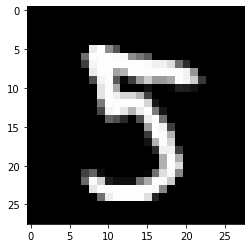

You should see a 5, image number 2545


In [53]:
img = np.random.randint(0, 10000)
im = test_data[img].reshape([28,28])
plt.imshow(im, cmap='gray')
plt.show()
print('You should see a {}, image number {}'.format(test_labels[img], img))

# Opening Training set Data and Labels

In [55]:
fname = 'train-images.idx3-ubyte'
with open(fname, 'rb') as file:
    bytes = file.read()

In [56]:
mnumber = int.from_bytes(bytes[0:4], 'big')
num_train_imgs = int.from_bytes(bytes[4:8], 'big')
rows = int.from_bytes(bytes[9:12], 'big')
cols = int.from_bytes(bytes[12:16],  'big')

print('Magic number: {}'.format(mnumber))
print('Number of images: {}'.format(num_train_imgs))
print('Rows: {}'.format(rows))
print('Columns: {}'.format(cols))
print('\nFirst two bytes:')
print(int.from_bytes(bytes[16:17], 'big'))
print(int.from_bytes(bytes[17:18], 'big'))

Magic number: 2051
Number of images: 60000
Rows: 28
Columns: 28

First two bytes:
0
0


In [57]:
nbytes = bytes[16:]
len(nbytes)

47040000

In [58]:
train_data = np.zeros([num_train_imgs, 784])
for i in range(num_train_imgs):
    lst = []
    byt = i * 784
    for j in range(784):
        lst.append((int.from_bytes(nbytes[byt:byt+1], 'big')))
        byt += 1
    train_data[i] = lst

In [59]:
train_data.shape

(60000, 784)

In [60]:
fname = 'train-labels.idx1-ubyte'
with open(fname, 'rb') as file:
    bytes = file.read()

In [61]:
nbytes = bytes[8:]

In [62]:
train_labels = np.zeros(num_train_imgs, dtype='int')
for i in range(num_train_imgs):
    train_labels[i] = int.from_bytes(nbytes[i:i+1], 'big')
train_labels.reshape([num_train_imgs,1]);

## Checking a random image

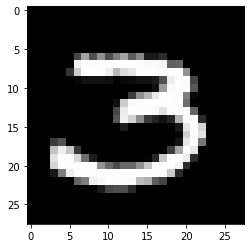

You should see a 3, image number 47096


In [63]:
img = np.random.randint(0, 60000)
plt.imshow(train_data[img].reshape([28, 28]), cmap='gray')
plt.show()
print('You should see a {}, image number {}'.format(train_labels[img], img + 1))